# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

%matplotlib inline

In [3]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [16]:
tsa.head(100)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,date_received_original
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,7-Feb-02
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,20-Jun-02
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,12-Jul-02
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,21-Aug-02
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,9-Sep-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,28808,25-Nov-02,11/15/2002 0:00,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$100.00,Approved,$100.00,Approve in Full,25-Nov-02
96,20544,25-Nov-02,10/12/2002 0:00,PHL,Philadelphia International Airport,Northwest Airlines,NaN,Other,Jewelry - Fine,$300.00,Canceled,NaN,NaN,25-Nov-02
97,21056,25-Nov-02,11/13/2002 0:00,MEM,Memphis International Airport,Northwest Airlines,NaN,Other,Other,$280.00,Canceled,NaN,NaN,25-Nov-02
98,28487,25-Nov-02,11/4/2002 0:00,DTW,Detroit Metropolitan Wayne County Airport,NaN,NaN,Other,Baby - Strollers; car seats; playpen; etc.,$200.00,Denied,$0.00,Deny,25-Nov-02


In [5]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [6]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [7]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [12]:
# claim number should be unique each row, there is a duplicate
tsa[tsa['Claim Number'] == '2013121110011']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
45776,2013121110011,30-Jul-13,5/15/2013 0:00,JAX,Jacksonville International,NaN,Personal Injury,Checkpoint,NaN,NaN,NaN,NaN,NaN
46705,2013121110011,21-Jul-14,15-May-13,JAX,Jacksonville International,NaN,Personal Injury,Checkpoint,NaN,NaN,NaN,NaN,NaN


Same claim number but different date received.Looks like an error in the data. it could be an input error

In [8]:
df_desc = []
for i in tsa.columns:
    df_desc.append([i, 
                  tsa[i].dtypes, 
                  tsa[i].isna().sum(), 
                  round((((tsa[i].isna().sum())/(len(tsa)))*100),2), 
                  tsa[i].nunique(),
                  tsa[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(df_desc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2004092363800, 0204017L]"
1,Date Received,object,70,0.14,3522,"[2-Jun-11, 10-Sep-10]"
2,Incident Date,object,570,1.12,10788,"[2/2/2010 5:00, 8/13/2013 7:00]"
3,Airport Code,object,2052,4.02,405,"[ITO, CSG]"
4,Airport Name,object,2052,4.02,419,"[Lincoln Municipal, Northwest Arkansas Regional]"
5,Airline Name,object,8555,16.75,243,"[Air Pacific , Air 2000 Ltd Great Britain]"
6,Claim Type,object,1960,3.84,8,"[Passenger Property Loss, Employee Loss (MPCECA)]"
7,Claim Site,object,190,0.37,6,"[Bus Station, nan]"
8,Item,object,1012,1.98,1854,"[Clothing; Other; Personal Accessories, Other;..."
9,Claim Amount,object,992,1.94,13248,"[$238.00 , $291.00 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [9]:
tsa = tsa.apply(lambda x: x.apply(lambda v: np.nan if v == '-' else v), axis=0)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [13]:
pd.to_datetime(tsa['Date Received'])

0       2002-02-07
1       2002-06-20
2       2002-07-12
3       2002-08-21
4       2002-09-09
           ...    
51061   2015-10-22
51062   2015-11-02
51063   2015-11-16
51064   2015-11-20
51065   2015-12-22
Name: Date Received, Length: 51066, dtype: datetime64[ns]

In [14]:
pd.to_datetime(tsa['Incident Date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 200-05-17 00:00:00

In [17]:
# let's retain the original version to compare before and after pd.to_datetime
tsa['date_received_original'] = tsa['Date Received']
tsa['incident_date_original'] = tsa['Incident Date']

In [19]:
list(tsa.columns)

['Claim Number',
 'Date Received',
 'Incident Date',
 'Airport Code',
 'Airport Name',
 'Airline Name',
 'Claim Type',
 'Claim Site',
 'Item',
 'Claim Amount',
 'Status',
 'Close Amount',
 'Disposition',
 'date_received_original',
 'incident_date_original']

In [23]:
#reposition column order
tsa = tsa[['Claim Number',
 'date_received_original',
 'Date Received',
 'incident_date_original',
 'Incident Date',
 'Airport Code',
 'Airport Name',
 'Airline Name',
 'Claim Type',
 'Claim Site',
 'Item',
 'Claim Amount',
 'Status',
 'Close Amount',
 'Disposition'
 ]]

In [26]:
tsa.head()

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,2002-02-07,1/6/2003 0:00,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,2002-06-20,6/16/2002 0:00,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,2002-07-12,5/31/2002 0:00,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,2002-08-21,7/12/2002 0:00,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,2002-09-09,8/30/2002 0:00,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [25]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [34]:
# should let the NaN value unconverted so we can sort later easier
tsa['Date Received'] = tsa.apply(lambda x: pd.to_datetime(x['date_received_original']) if pd.notna(x['date_received_original']) else np.nan, axis=1)


In [44]:
err_timeconvert_incident_time_idx = []
good_timeconvert_incident_time_idx = []
nan_timeconvert_incident_time_idx = []

def timeconvert_incident_time(x):
    curr_idx = x.name # this will return numpy int
    if pd.isna(x['incident_date_original']):
        nan_timeconvert_incident_time_idx.append(curr_idx)
        return np.nan
    try:
        cnv_time = pd.to_datetime(x['incident_date_original'])
        good_timeconvert_incident_time_idx.append(curr_idx)
        return cnv_time
    except:
        err_timeconvert_incident_time_idx.append(curr_idx)
        return pd.NaT #not a time    


tsa['Incident Date'] = tsa.apply(timeconvert_incident_time, axis=1)


In [45]:
err_timeconvert_incident_time_idx

[13729,
 14323,
 14856,
 14976,
 14995,
 15278,
 15934,
 16813,
 17198,
 19151,
 21528,
 22161,
 23232,
 24355,
 24525,
 24768,
 24903,
 25249,
 25705,
 25734,
 26129,
 26530,
 27086,
 27481,
 27628,
 27819,
 27901,
 28031,
 28037,
 29065,
 29652,
 31140,
 31570,
 31590,
 31771,
 33613]

In [46]:
nan_timeconvert_incident_time_idx

[11,
 19,
 28,
 29,
 32,
 33,
 43,
 44,
 47,
 61,
 66,
 110,
 111,
 134,
 145,
 182,
 192,
 197,
 211,
 213,
 214,
 215,
 221,
 228,
 249,
 268,
 269,
 290,
 294,
 304,
 318,
 321,
 333,
 334,
 335,
 342,
 348,
 359,
 363,
 372,
 373,
 386,
 387,
 388,
 414,
 417,
 432,
 434,
 435,
 451,
 452,
 464,
 466,
 508,
 545,
 592,
 595,
 603,
 625,
 627,
 631,
 643,
 644,
 647,
 649,
 658,
 660,
 704,
 709,
 715,
 716,
 723,
 726,
 727,
 728,
 743,
 744,
 746,
 758,
 760,
 761,
 765,
 766,
 767,
 768,
 773,
 777,
 778,
 782,
 791,
 795,
 796,
 799,
 800,
 802,
 804,
 805,
 807,
 816,
 817,
 821,
 822,
 833,
 834,
 836,
 848,
 850,
 855,
 865,
 868,
 869,
 870,
 880,
 883,
 884,
 903,
 908,
 913,
 914,
 935,
 936,
 941,
 942,
 944,
 947,
 953,
 961,
 962,
 967,
 969,
 970,
 984,
 996,
 1000,
 1004,
 1012,
 1025,
 1026,
 1034,
 1037,
 1051,
 1057,
 1061,
 1062,
 1063,
 1064,
 1065,
 1078,
 1089,
 1109,
 1116,
 1118,
 1119,
 1120,
 1121,
 1131,
 1134,
 1135,
 1136,
 1140,
 1144,
 1145,
 1146,
 11

In [58]:
tsa.iloc[err_timeconvert_incident_time_idx]

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,24-Jan-05,2005-01-24,17-MAY-0200 00:00,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,23-Feb-05,2005-02-23,17-FEB-0205 00:00,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,23-Mar-05,2005-03-23,07-MAR-0005 00:00,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,29-Mar-05,2005-03-29,04-MAR-0205 00:00,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,30-Mar-05,2005-03-30,18-MAR-0200 00:00,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,12-Apr-05,2005-04-12,12-MAR-0205 00:00,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,17-May-05,2005-05-17,01-MAY-0205 00:00,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,8-Jul-05,2005-07-08,01-JUL-0200 00:00,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,1-Aug-05,2005-08-01,01-MAY-0205 00:00,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,8-Dec-05,2005-12-08,20-NOV-0205 00:00,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [56]:
def convert_date_format(x):
    if x.name in err_timeconvert_incident_time_idx: 
        date_receive_year = x['Date Received'].year
        match = re.match(r'(\w+)-(\w+)-(\w+)', x['incident_date_original'])
#         print('{}-{}-{} 00:00'.format(match.group(1), match.group(2), date_receive_year), x['incident_date_original'])
        return pd.to_datetime('{}-{}-{} 00:00'.format(match.group(1), match.group(2), date_receive_year))
    else:
        return x['Incident Date']

tsa['Incident Date'] = tsa.apply(convert_date_format, axis=1)

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [59]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number              51066 non-null object
date_received_original    50996 non-null object
Date Received             50996 non-null datetime64[ns]
incident_date_original    50496 non-null object
Incident Date             50496 non-null datetime64[ns]
Airport Code              48915 non-null object
Airport Name              48915 non-null object
Airline Name              41470 non-null object
Claim Type                49035 non-null object
Claim Site                50817 non-null object
Item                      48918 non-null object
Claim Amount              46886 non-null object
Status                    47877 non-null object
Close Amount              33786 non-null object
Disposition               32846 non-null object
dtypes: datetime64[ns](2), object(13)
memory usage: 5.8+ MB


In [60]:
tsa.iloc[err_timeconvert_incident_time_idx]

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,24-Jan-05,2005-01-24,17-MAY-0200 00:00,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,23-Feb-05,2005-02-23,17-FEB-0205 00:00,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,23-Mar-05,2005-03-23,07-MAR-0005 00:00,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,29-Mar-05,2005-03-29,04-MAR-0205 00:00,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,30-Mar-05,2005-03-30,18-MAR-0200 00:00,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,12-Apr-05,2005-04-12,12-MAR-0205 00:00,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,17-May-05,2005-05-17,01-MAY-0205 00:00,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,8-Jul-05,2005-07-08,01-JUL-0200 00:00,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,1-Aug-05,2005-08-01,01-MAY-0205 00:00,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,8-Dec-05,2005-12-08,20-NOV-0205 00:00,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [63]:
tsa['Day Differences'] = tsa[['Date Received', 'Incident Date']].apply(lambda x: (x['Date Received'] - x['Incident Date']).days, axis=1)

In [64]:
tsa.head()

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,7-Feb-02,2002-02-07,1/6/2003 0:00,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,14268,20-Jun-02,2002-06-20,6/16/2002 0:00,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0
2,15242,12-Jul-02,2002-07-12,5/31/2002 0:00,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0
3,16759,21-Aug-02,2002-08-21,7/12/2002 0:00,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0
4,17846,9-Sep-02,2002-09-09,8/30/2002 0:00,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0


Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

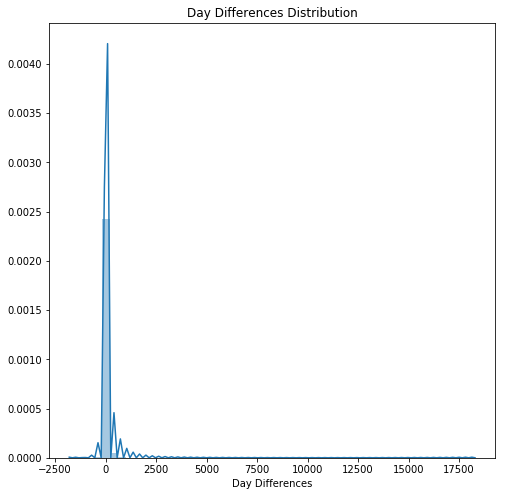

In [69]:
plt.figure(figsize=(8,8))
plt.title('Day Differences Distribution')

sns.distplot(tsa['Day Differences'].dropna())

Text(0.5, 1.0, 'Day Differences Distribution')

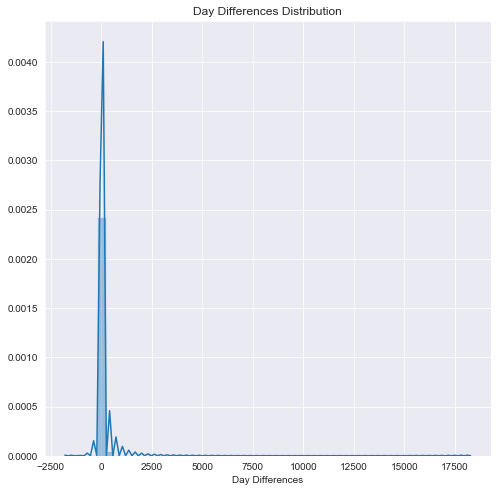

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

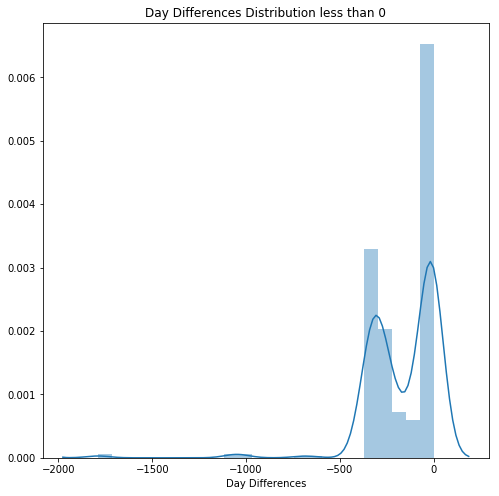

In [73]:
plt.figure(figsize=(8,8))
plt.title('Day Differences Distribution less than 0')

sns.distplot(tsa[tsa['Day Differences'].notna() & (tsa['Day Differences'] < 0)]['Day Differences'].dropna())

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

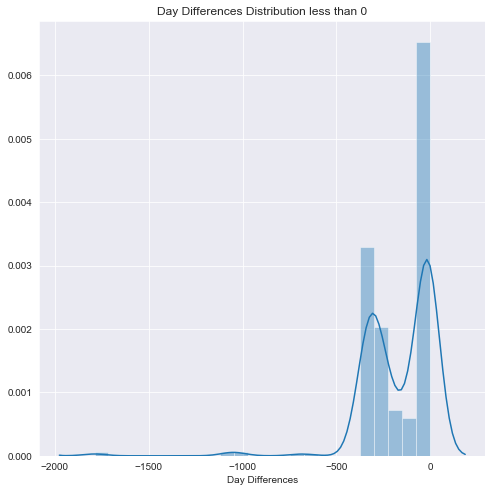

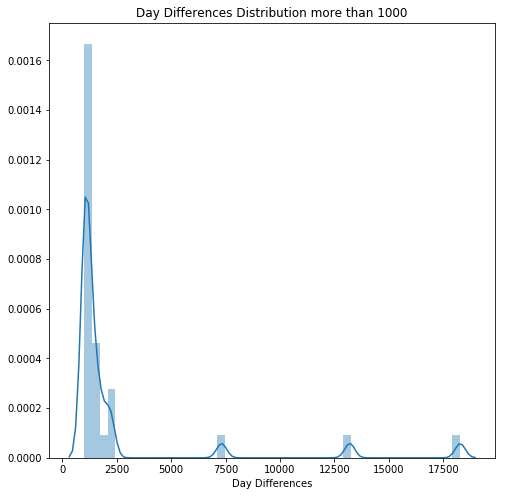

In [74]:
plt.figure(figsize=(8,8))
plt.title('Day Differences Distribution more than 1000')

sns.distplot(tsa[tsa['Day Differences'].notna() & (tsa['Day Differences'] > 1000)]['Day Differences'].dropna())

Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

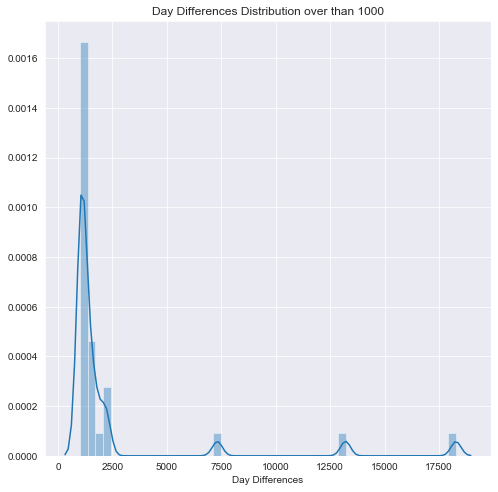

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

###### Investigate why there are day difference less than 0

In [78]:
ddiff_lt_0 = tsa[tsa['Day Differences'].notna() & (tsa['Day Differences'] < 0)]

ddiff_lt_0.head()

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,7-Feb-02,2002-02-07,1/6/2003 0:00,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
12,0616624L,30-Sep-02,2002-09-30,8/21/2003 0:00,2003-08-21,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$128.05,Denied,$0.00,Deny,-325.0
113,0616756L,3-Dec-02,2002-12-03,2/4/2003 0:00,2003-02-04,JAX,Jacksonville International,NaN,Passenger Property Loss,Checkpoint,Other,$120.00,Approved,$120.00,Approve in Full,-63.0
343,0114002M,14-Jan-03,2003-01-14,12/20/2003 0:00,2003-12-20,LAX,Los Angeles International Airport,American Airlines,NaN,Checked Baggage,Jewelry - Fine,$1;254.83,Denied,$0.00,Deny,-340.0
350,0115048M,15-Jan-03,2003-01-15,10/8/2003 0:00,2003-10-08,JAX,Jacksonville International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$49.99,Approved,$49.99,Approve in Full,-266.0


In [79]:
ddiff_lt_0.describe()

,Day Differences
count,448.000000
mean,-165.750000
std,199.907361
min,-1789.000000
25%,-303.250000
50%,-95.500000
75%,-10.000000
max,-1.000000


In [80]:
ddiff_lt_0['Status'].value_counts()

Denied                                                                                                                           190
Approved                                                                                                                          90
Settled                                                                                                                           73
Canceled                                                                                                                          21
Deny                                                                                                                              16
Approve in Full                                                                                                                   13
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.     13
Closed as a contractor claim                                         

In [81]:
ddiff_lt_0['Disposition'].value_counts()

Deny               191
Approve in Full     90
Settle              73
Name: Disposition, dtype: int64

Half of the claims that has less than 0 day difference have been Denied or Canceled

In [85]:
ddiff_lt_0[ddiff_lt_0['Status'] == 'Approved'].sample(20)

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
13256,2006010999177,4-Jan-05,2005-01-04,12/4/2005 0:00,2005-12-04 00:00:00,MKE,General Mitchell International Airport,NaN,Passenger Property Loss,Checked Baggage,Locks,$6.31,Approved,$6.31,Approve in Full,-334.0
9427,2004070658310,17-Jun-04,2004-06-17,6/21/2004 0:00,2004-06-21 00:00:00,NaN,NaN,Southwest Airlines,Passenger Property Loss,Checked Baggage,Computer - Laptop,$164.86,Approved,$164.86,Approve in Full,-4.0
14228,2005031578293,16-Feb-05,2005-02-16,7/30/2005 0:00,2005-07-30 00:00:00,MDW,Midway International Airport,ATA Aerocondor,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$275.00,Approved,$275.00,Approve in Full,-164.0
6862,0212080M,12-Feb-04,2004-02-12,11/29/2004 0:00,2004-11-29 00:00:00,LGA,LaGuardia,American Airlines,NaN,Checked Baggage,Computer - Laptop,$708.99,Approved,$708.99,Approve in Full,-291.0
8617,2004061455536,10-May-04,2004-05-10,12/20/2004 0:00,2004-12-20 00:00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Other,$84.25,Approved,$84.25,Approve in Full,-224.0
29388,2008021939773,31-Jan-08,2008-01-31,12/12/2008 0:00,2008-12-12 00:00:00,TPA,Tampa International,USAir,Passenger Property Loss,Checked Baggage,Locks,$19.28,Approved,$19.28,Approve in Full,-316.0
33167,2009123066925,13-Jan-09,2009-01-13,11/23/2009 14:06,2009-11-23 14:06:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$50.99,Approved,$50.99,Approve in Full,-315.0
10203,2004122170035,1-Aug-04,2004-08-01,8/23/2004 0:00,2004-08-23 00:00:00,BNA,Nashville International,American Airlines,Passenger Property Loss,Checked Baggage,NaN,$50.00,Approved,$50.00,Approve in Full,-22.0
26345,2007070527851,3-Jun-07,2007-06-03,6/8/2007 0:00,2007-06-08 00:00:00,KOA,Kona International,Hawaiian Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicine...,$94.51,Approved,$94.51,Approve in Full,-5.0
33708,2010010767300,12-Mar-09,2009-03-12,7/30/2009 0:00,2009-07-30 00:00:00,BDL,Bradley International Airport,Delta Air Lines,Property Damage,Checkpoint,Handbags & Purses (leather or fabric),$35.00,Approved,$35.00,Approve in Full,-140.0


In [89]:
err_convert_match = []
for i in ddiff_lt_0.index:
    if i in err_timeconvert_incident_time_idx:
        err_convert_match.append(i)

err_convert_match

[13729, 22161, 24355, 24525, 24768, 29065]

In [92]:
tsa.iloc[err_convert_match]

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
13729,2005021676300,24-Jan-05,2005-01-24,17-MAY-0200 00:00,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full,-113.0
22161,2006072610104,14-Jul-06,2006-07-14,25-OCT-0200 00:00,2006-10-25,MEM,Memphis International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Cell Phones,$35.00,Denied,$0.00,Deny,-103.0
24355,2007010418246,3-Jan-07,2007-01-03,03-NOV-0206 00:00,2007-11-03,OMA,Eppley Airfield,Skywest Airlines Inc USA,Passenger Property Loss,Checked Baggage,Jewelry - Costume,$135.00,Denied,$0.00,Deny,-304.0
24525,2007011718892,10-Jan-07,2007-01-10,12-AUG-0201 00:00,2007-08-12,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checked Baggage,Video Recordings (blank & commercial),$317.64,Settled,$158.82,Settle,-214.0
24768,2007013119947,26-Jan-07,2007-01-26,19-DEC-0206 00:00,2007-12-19,PHX,Phoenix Sky Harbor International,Northwest Airlines,Property Damage,Checked Baggage,Other,$90.00,Denied,$0.00,Deny,-327.0
29065,2008011437819,7-Jan-08,2008-01-07,30-NOV-0002 00:00,2008-11-30,RAP,Rapid City Regional,Northwest Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Lu...,$200.00,Denied,$0.00,Deny,-328.0


From the information I gathered, and [based on this claim form format](https://www.tsa.gov/sites/default/files/sf95_cover_package_rev6_28.pdf), the incident date is filled manually by the person who submit the claim, and it is based on estimation/memory. Incident date is prone to input error 

###### Investigate why there are day difference more than 1000

In [93]:
ddiff_gt_1000 = tsa[tsa['Day Differences'].notna() & (tsa['Day Differences'] > 1000)]

ddiff_gt_1000.head()

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
5727,1217135M,17-Dec-03,2003-12-17,1/1/2000 0:00,2000-01-01,NaN,NaN,Continental Airlines,Property Damage,Checked Baggage,Other,$190.00,Settled,$90.00,Settle,1446.0
6885,0212302M,12-Feb-04,2004-02-12,2/1/2001 0:00,2001-02-01,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$65.00,Approved,$65.00,Approve in Full,1106.0
7257,0305106M,5-Mar-04,2004-03-05,1/1/2000 0:00,2000-01-01,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full,1525.0
9994,2004082661422,19-Jul-04,2004-07-19,5/10/2001 0:00,2001-05-10,MCN,Middle Georgia Regional Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$3;767.85,Closed as a contractor claim,$0.00,NaN,1166.0
10932,2004100464331,9-Sep-04,2004-09-09,9/1/2001 0:00,2001-09-01,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$30.00,Approved,$30.00,Approve in Full,1104.0


In [94]:
ddiff_gt_1000.describe()

,Day Differences
count,30.000000
mean,2488.933333
std,3839.660132
min,1002.000000
25%,1104.500000
50%,1129.500000
75%,1673.750000
max,18279.000000


In [97]:
ddiff_gt_1000['Status'].value_counts()

Denied                                                                                                                           12
Approved                                                                                                                          8
Settled                                                                                                                           3
Canceled                                                                                                                          2
Closed as a contractor claim                                                                                                      2
Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.     1
Name: Status, dtype: int64

In [98]:
ddiff_gt_1000['Disposition'].value_counts()

Deny               12
Approve in Full     8
Settle              3
Name: Disposition, dtype: int64

Most of the claims that has day difference greater than 1000 are denied or canceled as well

In [99]:
ddiff_gt_1000[ddiff_gt_1000['Status'] == 'Approved']

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
6885,0212302M,12-Feb-04,2004-02-12,2/1/2001 0:00,2001-02-01 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$65.00,Approved,$65.00,Approve in Full,1106.0
7257,0305106M,5-Mar-04,2004-03-05,1/1/2000 0:00,2000-01-01 00:00:00,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full,1525.0
10932,2004100464331,9-Sep-04,2004-09-09,9/1/2001 0:00,2001-09-01 00:00:00,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$30.00,Approved,$30.00,Approve in Full,1104.0
23508,2006111415554,2-Nov-06,2006-11-02,10/23/2000 0:00,2000-10-23 00:00:00,JFK,John F. Kennedy International,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$12.72,Approved,$12.72,Approve in Full,2201.0
24271,0212087M,12-Feb-40,2040-02-12,12/20/2003 0:00,2003-12-20 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Property Damage,Checked Baggage,Other,$8.48,Approved,$8.48,Approve in Full,13203.0
27036,2004082761476,27-Jul-07,2007-07-27,7/14/2004 0:00,2004-07-14 00:00:00,ELP,El Paso International Airport,Southwest Airlines,Passenger Theft,Checkpoint,Currency,$100.00,Approved,$100.00,Approve in Full,1108.0
29819,2005032579905,9-Mar-08,2008-03-09,2/18/2005 0:00,2005-02-18 00:00:00,GRK,Kileen - Ft. Hood Regional,NaN,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),$273.00,Approved,$273.00,Approve in Full,1115.0
32495,2008110651978,31-Oct-08,2008-10-31,12/25/2002 18:00,2002-12-25 18:00:00,ERI,Erie International,USAir,Property Damage,Checkpoint,Audio - Other (Phonograph; cassettes; etc),$58.25,Approved,$58.25,Approve in Full,2136.0


Apart from the input error. TSA also process claims in relatively long time. Based on the information i got from [TSA Claims FAQ](https://www.tsa.gov/travel/passenger-support/claims) :

"Please allow up to six months to fully investigate your claim. Claims that require law enforcement investigation may take longer."

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [111]:
tsa.head()

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,7-Feb-02,2002-02-07,1/6/2003 0:00,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,14268,20-Jun-02,2002-06-20,6/16/2002 0:00,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0
2,15242,12-Jul-02,2002-07-12,5/31/2002 0:00,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0
3,16759,21-Aug-02,2002-08-21,7/12/2002 0:00,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0
4,17846,9-Sep-02,2002-09-09,8/30/2002 0:00,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0


In [114]:
def clean_amt(x):
    
    if pd.notna(x):
        x = re.sub(r'[\$]','',x)
        x = re.sub(r'[;]','', x)
        return float(x)
    else:
        return x
    
tsa['Claim Amount'] = tsa['Claim Amount'].apply(clean_amt)
tsa['Close Amount'] = tsa['Close Amount'].apply(clean_amt)

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [116]:
tsa['Amount Differences'] = tsa.apply(lambda x: (x['Claim Amount'] - x['Close Amount']), axis=1)

In [117]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 17 columns):
Claim Number              51066 non-null object
date_received_original    50996 non-null object
Date Received             50996 non-null datetime64[ns]
incident_date_original    50496 non-null object
Incident Date             50496 non-null datetime64[ns]
Airport Code              48915 non-null object
Airport Name              48915 non-null object
Airline Name              41470 non-null object
Claim Type                49035 non-null object
Claim Site                50817 non-null object
Item                      48918 non-null object
Claim Amount              46886 non-null float64
Status                    47877 non-null object
Close Amount              33786 non-null float64
Disposition               32846 non-null object
Day Differences           50460 non-null float64
Amount Differences        33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(11)
memor

In [23]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

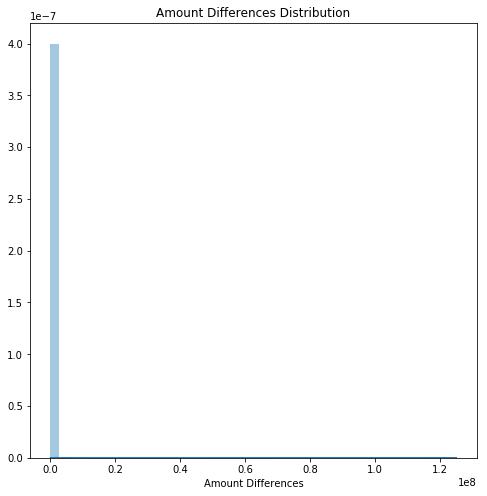

In [118]:
plt.figure(figsize=(8,8))
plt.title('Amount Differences Distribution')

sns.distplot(tsa['Amount Differences'].dropna())

Text(0.5, 1.0, 'Amount Differences Distribution')

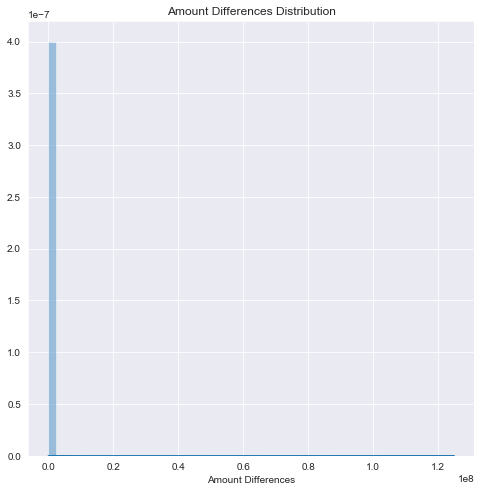

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [119]:
tsa['Amount Differences'].describe()

count    3.347000e+04
mean     5.217843e+03
std      6.843299e+05
min     -4.311000e+02
25%      0.000000e+00
50%      9.629000e+01
75%      3.400000e+02
max      1.250000e+08
Name: Amount Differences, dtype: float64

In [170]:
amtdiff_q1 = tsa['Amount Differences'].describe()['25%']
amtdiff_q3 = tsa['Amount Differences'].describe()['75%']
amtdiff_iqr = amtdiff_q3-amtdiff_q1
amtdiff_batasbawah = amtdiff_q1 - (1.5 * amtdiff_iqr)
amtdiff_batasatas = amtdiff_q3 + (1.5 * amtdiff_iqr)

print(amtdiff_batasbawah, amtdiff_batasatas)

-510.0 850.0


In [171]:
amtdiff_outlier =  tsa[(tsa['Amount Differences'] < amtdiff_batasbawah) | (tsa['Amount Differences']> amtdiff_batasatas) ]

amtdiff_not_outlier =  tsa[(tsa['Amount Differences'] > amtdiff_batasbawah) & (tsa['Amount Differences'] < amtdiff_batasatas) ]

In [172]:
amtdiff_outlier

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences,item_category
4,17846,9-Sep-02,2002-09-09,8/30/2002 0:00,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22,Luggage
13,19133,2-Oct-02,2002-10-02,8/22/2002 0:00,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00,Computer
21,18614,17-Oct-02,2002-10-17,9/14/2002 0:00,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00,Computer
23,18356,23-Oct-02,2002-10-23,9/18/2002 0:00,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32,Computer
27,21817,29-Oct-02,2002-10-29,10/5/2002 0:00,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,29-Dec-09,2009-12-29,12/18/2009 0:00,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00,Other
36210,2009123167017,29-Dec-09,2009-12-29,12/2/2009 15:30,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00,Clothing
36213,2010010867323,29-Dec-09,2009-12-29,12/21/2009 15:15,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00,Computer
36225,2009123066912,30-Dec-09,2009-12-30,12/15/2009 0:00,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00,Other


In [132]:
amtdiff_outlier['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [133]:
amtdiff_outlier['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

In [138]:
amtdiff_outlier[amtdiff_outlier['Status'] != 'Denied'].sample(20)

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
35074,2009081862707,11-Aug-09,2009-08-11,2/15/2009 0:00,2009-02-15,NaN,NaN,Virgin America,Passenger Property Loss,Checkpoint,NaN,2300.00,Closed as a contractor claim,0.00,NaN,177.0,2300.00
18174,2005101294394,27-Sep-05,2005-09-27,9/12/2005 0:00,2005-09-12,PHL,Philadelphia International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Other,1550.00,Settled,325.00,Settle,15.0,1225.00
26398,2007061126631,6-Jun-07,2007-06-06,6/2/2007 0:00,2007-06-02,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Computer - Laptop,1200.00,Canceled,0.00,NaN,4.0,1200.00
10182,2004072960183,28-Jul-04,2004-07-28,3/3/2004 0:00,2004-03-03,BWI,Baltimore/Washington Intl Thurgood Marshall,America West,Passenger Property Loss,Checked Baggage,Computer - Laptop,1212.54,Settled,250.00,Settle,147.0,962.54
6099,0107278M,7-Jan-04,2004-01-07,12/27/2003 0:00,2003-12-27,MSY,New Orleans International,USAir,Passenger Property Loss,Checked Baggage,Computer - Laptop,3500.00,Settled,779.64,Settle,11.0,2720.36
23573,2006111315465,7-Nov-06,2006-11-07,9/14/2006 0:00,2006-09-14,DFW,Dallas-Fort Worth International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Locks,1012.39,Settled,12.39,Settle,54.0,1000.00
23668,2006112115980,15-Nov-06,2006-11-15,11/6/2006 0:00,2006-11-06,MHT,Manchester Regional Airport,UAL,Passenger Property Loss,Checked Baggage,Jewelry - Fine,5000.00,Canceled,0.00,NaN,9.0,5000.00
8106,2004052453272,20-Apr-04,2004-04-20,3/30/2004 0:00,2004-03-30,JFK,John F. Kennedy International,American Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,3276.00,Settled,1637.50,Settle,21.0,1638.50
20578,2006032103482,15-Mar-06,2006-03-15,1/11/2006 0:00,2006-01-11,LAX,Los Angeles International Airport,British Airways,Passenger Property Loss,Checked Baggage,Computer - Laptop,3244.54,Settled,547.72,Settle,63.0,2696.82
15273,2005041382372,12-Apr-05,2005-04-12,4/6/2005 0:00,2005-04-06,SFO,San Francisco International,UAL,Passenger Property Loss,Checkpoint,Computer - Laptop,3000.00,Closed as a contractor claim,0.00,NaN,6.0,3000.00


It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

I want to check your assumption to define what the 'acceptable claim amount' or considered as proper claim amount.
I'll compare it with the item of the claim

In [139]:
tsa['Item'].value_counts()

Other                                                                                                                                                                                                                                                                                 9183
Luggage (all types including footlockers)                                                                                                                                                                                                                                             4818
Clothing - Shoes; belts; accessories; etc.                                                                                                                                                                                                                                            3761
Jewelry - Fine                                                                                                                                         

In [169]:
# Let's simplify the item list

def item_cleanup(x):
    
    if type(x) != float:
        x = x.split('-')[0]
    else:
        x = 'Other'
        
    x = x.split(' (')[0]
    x = x.split('&')[0]
    x = x.split(';')[0]
    x = x.strip()
    return x

    
tsa['item_category'] = tsa['Item'].apply(item_cleanup)

tsa.head()


,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences,item_category
0,0909816M,7-Feb-02,2002-02-07,1/6/2003 0:00,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00,Luggage
1,14268,20-Jun-02,2002-06-20,6/16/2002 0:00,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN,Computer
2,15242,12-Jul-02,2002-07-12,5/31/2002 0:00,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00,Luggage
3,16759,21-Aug-02,2002-08-21,7/12/2002 0:00,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44,Other
4,17846,9-Sep-02,2002-09-09,8/30/2002 0:00,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22,Luggage


In [166]:
['item_category'].value_counts()[:15]

Other                   11501
Clothing                 5888
Luggage                  4878
Jewelry                  4034
Computer                 3671
Cameras                  3556
Locks                    2604
Baggage/Cases/Purses     2047
Cosmetics                1830
Eyeglasses               1025
Currency                  950
Travel Accessories        944
Personal Electronics      860
Cell Phones               649
Personal Accessories      604
Name: item_category, dtype: int64

Many passengers have lost clothing and gadgets :). Why would you check in your computers/jewellery inside your luggage??

In [160]:
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [162]:
try_normal(amtdiff_outlier['Claim Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1559.8322253694841},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [163]:
try_normal(amtdiff_not_outlier['Claim Amount'])

/Users/rprilian/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 8143.945700461125},
 'Shapiro': 0.0,
 'K^2': 0.0}

Let's see the typical claim amount in each category, and we can compare it between not outlier and outlier

In [188]:
top15item = np.array(tsa['item_category'].value_counts()[:15].index)

#we exclude Other since it's hard to compare
top15item_outlier = amtdiff_outlier[amtdiff_outlier['item_category'].isin(top15item)]
top15item_not_outlier = amtdiff_not_outlier[amtdiff_not_outlier['item_category'].isin(top15item)]


In [189]:
top15item_outlier['item_category'].value_counts()

Computer       1195
Jewelry         937
Other           599
Cameras         365
Clothing        280
Currency        112
Luggage          89
Cosmetics        52
Cell Phones      42
Eyeglasses       20
Locks            19
Name: item_category, dtype: int64

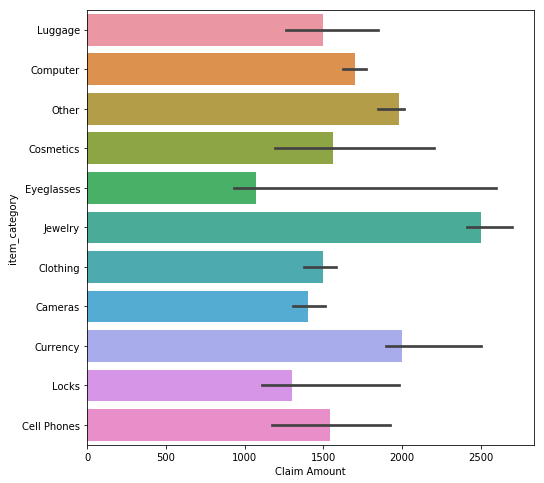

In [191]:
plt.figure(figsize=(8,8))

sns.barplot(data=top15item_outlier, x='Claim Amount', y='item_category', estimator = np.median)

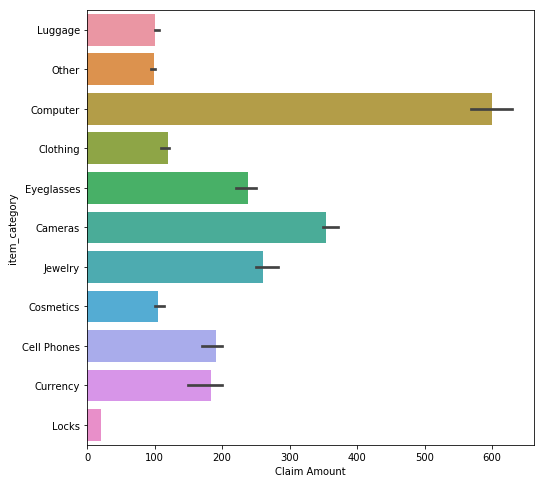

In [192]:
plt.figure(figsize=(8,8))

sns.barplot(data=top15item_not_outlier, x='Claim Amount', y='item_category', estimator = np.median)

It seems that people tends to make outragous claim amount for items in outlier claims compared to same item in not outlier

In [211]:
#Non-Parametric Test
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(top15item_outlier[top15item_outlier['item_category'] == 'Computer']['Claim Amount'], 
                        top15item_not_outlier[top15item_not_outlier['item_category'] == 'Computer']['Claim Amount']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 89314.5
P-Value: 8.395698297575605e-242


In [212]:
#Non-Parametric Test
result = list(mannwhitneyu(top15item_outlier[top15item_outlier['item_category'] == 'Jewelry']['Claim Amount'], 
                        top15item_not_outlier[top15item_not_outlier['item_category'] == 'Jewelry']['Claim Amount']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 26559.0
P-Value: 0.0


both outlier and non-outlier group have significant difference in terms of claim amount

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

**Question1**

In [203]:
tsa.groupby('Airport Code').count().sort_values(by = 'Claim Number', ascending = False).head(15)

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences,item_category
Airport Code,,,,,,,,,,,,,,,,,
LAX,2379,2377,2377,2364,2364,2379,1902,2279,2373,2305,2187,2223,1613,1586,2362,1602,2379
JFK,2286,2285,2285,2282,2282,2286,2019,2233,2281,2174,2025,2050,1258,1250,2281,1253,2286
EWR,1747,1747,1747,1737,1737,1747,1500,1676,1736,1681,1616,1638,1178,1177,1737,1173,1747
ORD,1712,1712,1712,1704,1704,1712,1439,1652,1706,1650,1593,1620,1209,1199,1704,1201,1712
MCO,1633,1630,1630,1631,1631,1633,1408,1592,1624,1561,1531,1546,970,956,1628,967,1633
MIA,1613,1612,1612,1607,1607,1613,1356,1548,1607,1548,1437,1462,1028,1023,1606,1023,1613
ATL,1525,1523,1523,1519,1519,1525,1331,1490,1524,1455,1360,1384,917,917,1517,912,1525
SEA,1330,1329,1329,1323,1323,1330,1088,1286,1330,1294,1230,1248,920,905,1323,913,1330
LAS,1278,1278,1278,1272,1272,1278,1086,1242,1273,1231,1211,1230,873,866,1272,868,1278


In [204]:
tsa.groupby('Airline Name').count().sort_values(by = 'Claim Number', ascending = False).head(15)

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences,item_category
Airline Name,,,,,,,,,,,,,,,,,
American Airlines,4377,4369,4369,4361,4361,4293,4293,4211,4368,4244,4226,4285,3891,3796,4353,3881,4377
Delta Air Lines,4371,4370,4370,4355,4355,4287,4287,4210,4364,4228,4212,4281,3845,3752,4354,3830,4371
UAL,3507,3506,3506,3498,3498,3447,3447,3385,3499,3387,3394,3444,3061,2923,3497,3049,3507
Southwest Airlines,3258,3254,3254,3247,3247,3220,3220,3169,3250,3113,3132,3175,2750,2698,3243,2739,3258
Continental Airlines,2363,2363,2363,2356,2356,2319,2319,2285,2356,2312,2328,2363,2261,2217,2356,2257,2363
USAir,2359,2357,2357,2349,2349,2298,2298,2270,2352,2299,2304,2336,2130,2091,2347,2123,2359
Northwest Airlines,2311,2311,2311,2303,2303,2239,2239,2222,2305,2261,2273,2311,2214,2151,2303,2203,2311
Delta Air Lines,2074,2074,2074,2074,2074,2070,2070,2070,2074,1930,1672,1672,0,0,2074,0,2074
Southwest Airlines,1899,1899,1899,1899,1899,1899,1899,1896,1896,1757,1519,1519,0,0,1899,0,1899


Some airports or airlines have higher amount of claims compared to others. However it doesn't necessarily mean that one airport/airline is worse than other. We need to take a look at other data like average passenger counts and we can see the proportion better (number of claims over number of passengers).

[Top 10 busiest airport in US](https://www.businesschief.com/top10/8393/Top-10-busiest-airports-US)

From above article, top 5 airports in our datasets are considered as busiest airports in US, so number of claims could be higher than others (less busy airport)

But high number of claims could hurt the business because it will lead to negative reviews. At least from this number, authorities should take more precaution action

let's see claim types


In [205]:
tsa['Claim Type'].value_counts()

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

In [206]:
for i in tsa['Airport Code'].unique():
    print()
    print('---------')
    print('Airport Code: {}'.format(i))
    print('---------')
    print(tsa[tsa['Airport Code'] == i]['Claim Type'].value_counts())


---------
Airport Code: MIA
---------
Passenger Property Loss    997
Property Damage            529
Personal Injury             10
Passenger Theft              6
Employee Loss (MPCECA)       5
Motor Vehicle                1
Name: Claim Type, dtype: int64

---------
Airport Code: PHX
---------
Passenger Property Loss    706
Property Damage            501
Personal Injury             15
Passenger Theft              6
Employee Loss (MPCECA)       5
Complaint                    1
Name: Claim Type, dtype: int64

---------
Airport Code: BWI
---------
Passenger Property Loss    428
Property Damage            252
Passenger Theft              6
Personal Injury              4
Employee Loss (MPCECA)       1
Name: Claim Type, dtype: int64

---------
Airport Code: BOS
---------
Passenger Property Loss    606
Property Damage            371
Personal Injury              8
Employee Loss (MPCECA)       2
Motor Vehicle                1
Name: Claim Type, dtype: int64

---------
Airport Code: nan
---------

Passenger Property Loss    153
Property Damage            122
Employee Loss (MPCECA)       2
Complaint                    1
Personal Injury              1
Name: Claim Type, dtype: int64

---------
Airport Code: ABQ
---------
Passenger Property Loss    129
Property Damage             84
Personal Injury              2
Complaint                    1
Name: Claim Type, dtype: int64

---------
Airport Code: MHT
---------
Passenger Property Loss    94
Property Damage            72
Name: Claim Type, dtype: int64

---------
Airport Code: TRI
---------
Passenger Property Loss    24
Property Damage            18
Name: Claim Type, dtype: int64

---------
Airport Code: CID
---------
Property Damage            19
Passenger Property Loss    10
Name: Claim Type, dtype: int64

---------
Airport Code: FNT
---------
Passenger Property Loss    34
Property Damage            14
Personal Injury             2
Name: Claim Type, dtype: int64

---------
Airport Code: TUS
---------
Passenger Property Loss    110


Passenger Property Loss    48
Property Damage            22
Name: Claim Type, dtype: int64

---------
Airport Code: TVC
---------
Passenger Property Loss    16
Property Damage             3
Name: Claim Type, dtype: int64

---------
Airport Code: DAL
---------
Passenger Property Loss    71
Property Damage            56
Personal Injury             2
Name: Claim Type, dtype: int64

---------
Airport Code: STT
---------
Passenger Property Loss    61
Property Damage            21
Employee Loss (MPCECA)      2
Passenger Theft             1
Name: Claim Type, dtype: int64

---------
Airport Code: ISP
---------
Passenger Property Loss    38
Property Damage            35
Personal Injury             2
Complaint                   1
Name: Claim Type, dtype: int64

---------
Airport Code: HRL
---------
Passenger Property Loss    15
Property Damage            10
Name: Claim Type, dtype: int64

---------
Airport Code: SBA
---------
Passenger Property Loss    23
Property Damage            16
Name: Clai

Passenger Property Loss    12
Property Damage             7
Name: Claim Type, dtype: int64

---------
Airport Code: MFR
---------
Passenger Property Loss    27
Property Damage             7
Name: Claim Type, dtype: int64

---------
Airport Code: ALO
---------
Property Damage            5
Passenger Property Loss    5
Name: Claim Type, dtype: int64

---------
Airport Code: MCN
---------
Passenger Property Loss    1
Name: Claim Type, dtype: int64

---------
Airport Code: BMI
---------
Passenger Property Loss    12
Property Damage             8
Name: Claim Type, dtype: int64

---------
Airport Code: MSN
---------
Passenger Property Loss    49
Property Damage            31
Name: Claim Type, dtype: int64

---------
Airport Code: LCH
---------
Passenger Property Loss    3
Property Damage            1
Name: Claim Type, dtype: int64

---------
Airport Code: SPI
---------
Passenger Property Loss    3
Property Damage            1
Name: Claim Type, dtype: int64

---------
Airport Code: JAC
-------

Passenger Property Loss    1
Name: Claim Type, dtype: int64

---------
Airport Code: MLB
---------
Passenger Property Loss    5
Property Damage            4
Name: Claim Type, dtype: int64

---------
Airport Code: YKM
---------
Passenger Property Loss    6
Property Damage            5
Name: Claim Type, dtype: int64

---------
Airport Code: PAH
---------
Property Damage            3
Passenger Property Loss    1
Name: Claim Type, dtype: int64

---------
Airport Code: ENA
---------
Passenger Property Loss    3
Property Damage            1
Name: Claim Type, dtype: int64

---------
Airport Code: OAJ
---------
Passenger Property Loss    4
Property Damage            3
Name: Claim Type, dtype: int64

---------
Airport Code: CPR
---------
Passenger Property Loss    12
Property Damage             5
Name: Claim Type, dtype: int64

---------
Airport Code: INL
---------
Passenger Property Loss    7
Property Damage            2
Name: Claim Type, dtype: int64

---------
Airport Code: ACK
---------
Pas

Personal Injury    1
Name: Claim Type, dtype: int64

---------
Airport Code: BHB
---------
Property Damage            1
Passenger Property Loss    1
Name: Claim Type, dtype: int64

---------
Airport Code: TBN
---------
Property Damage            1
Passenger Property Loss    1
Name: Claim Type, dtype: int64

---------
Airport Code: ALW
---------
Passenger Property Loss    5
Property Damage            2
Name: Claim Type, dtype: int64

---------
Airport Code: GCC
---------
Motor Vehicle              1
Passenger Property Loss    1
Name: Claim Type, dtype: int64

---------
Airport Code: HYA
---------
Passenger Property Loss    1
Name: Claim Type, dtype: int64

---------
Airport Code: BIS
---------
Passenger Property Loss    4
Name: Claim Type, dtype: int64

---------
Airport Code: IWA
---------
Passenger Property Loss    5
Property Damage            4
Name: Claim Type, dtype: int64

---------
Airport Code: PBG
---------
Property Damage            2
Passenger Property Loss    2
Name: Claim T

Most dominant Claim Type are **Passenger Property Loss** and **Property Damage** and it's been consistent among the airports. We should really look into light travel lifestyle. we can't trust the airport service

In [209]:
tsa[tsa['Claim Type'].isna()]['item_category'].value_counts()

Other                   718
Luggage                 268
Clothing                262
Jewelry                 194
Cameras                 146
Locks                    84
Computer                 63
Eyeglasses               63
Cosmetics                55
Currency                 44
Cell Phones              34
DVD/CD Players           19
Stereo Items             12
Fish/Game                10
PDA                       9
Baggage/Cases/Purses      6
Photographic Film         6
Personal Accessories      5
Personal Electronics      4
Medicines                 4
Musical Instruments       4
Baby                      3
Bags                      2
Boxes                     2
Dishes                    2
Home Decor                1
Travel Accessories        1
Alcoholic beverages       1
Handbags                  1
Bedding                   1
Toys                      1
Food                      1
Tools                     1
Automobile Parts          1
Hunting                   1
Bicycles            

we could see that NaN claim types are caused by errors in data input, since most of the item claimed could fit to other claim type category

**Question2**

In [213]:
tsa.head()

,Claim Number,date_received_original,Date Received,incident_date_original,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences,item_category
0,0909816M,7-Feb-02,2002-02-07,1/6/2003 0:00,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00,Luggage
1,14268,20-Jun-02,2002-06-20,6/16/2002 0:00,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN,Computer
2,15242,12-Jul-02,2002-07-12,5/31/2002 0:00,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00,Luggage
3,16759,21-Aug-02,2002-08-21,7/12/2002 0:00,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44,Other
4,17846,9-Sep-02,2002-09-09,8/30/2002 0:00,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22,Luggage


In [215]:
tsa['Status'].value_counts()

Denied                                                                                                                           17134
Approved                                                                                                                          8724
Deny                                                                                                                              7010
Settled                                                                                                                           6970
Approve in Full                                                                                                                   3165
Canceled                                                                                                                          1708
Settle                                                                                                                            1453
Insufficient; one of the following items required: sum 

In [216]:
tsa['Disposition'].value_counts()

Deny               17147
Approve in Full     8727
Settle              6972
Name: Disposition, dtype: int64

In [220]:
from scipy.stats import chi2_contingency

chi_res = chi2_contingency(pd.crosstab(tsa['Status'], tsa['Disposition']))

print('Status vs Disposition chi2 stat: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Status vs Disposition chi2 stat: 65671.16926057872, p-value: 0.0


In [224]:
from scipy.stats import chi2_contingency

chi_res = chi2_contingency(pd.crosstab(tsa['Status'], tsa['Claim Type']))

print('Status vs Disposition chi2 stat: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Status vs Disposition chi2 stat: 2805.917755457185, p-value: 0.0


In [225]:
from scipy.stats import chi2_contingency

chi_res = chi2_contingency(pd.crosstab(tsa['Status'], tsa['item_category']))

print('Status vs Disposition chi2 stat: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Status vs Disposition chi2 stat: 26490.264318960566, p-value: 0.0


Both feature are statistically significant

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [32]:
np.random.seed(101)

In [226]:
amtdiff_not_outlier.dropna().sample(1000).to_csv('tsa_claims_dashboard.csv')

Export the data to your SQL database, and try to connect the database to the dashboard

In [227]:
tsa['Claim Site'].value_counts()

Checked Baggage    39937
Checkpoint         10051
Other                695
Motor Vehicle        131
Bus Station            3
Name: Claim Site, dtype: int64

In [228]:
tsa.columns

Index(['Claim Number', 'date_received_original', 'Date Received',
       'incident_date_original', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences', 'Amount Differences', 'item_category'],
      dtype='object')

In [229]:
tsa.describe()

,Claim Amount,Close Amount,Day Differences,Amount Differences
count,4.688600e+04,33786.000000,50460.000000,3.347000e+04
mean,4.407323e+03,101.841162,41.768173,5.217843e+03
std,5.807553e+05,1468.609392,131.353407,6.843299e+05
min,0.000000e+00,0.000000,-1789.000000,-4.311000e+02
25%,2.702250e+01,0.000000,12.000000,0.000000e+00
50%,1.135100e+02,0.000000,23.000000,9.629000e+01
75%,3.495775e+02,70.000000,45.000000,3.400000e+02
max,1.250000e+08,250000.000000,18279.000000,1.250000e+08
